In [26]:
import pandas as pd
import numpy as np
import os
import pandas.io.sql as pd_sql
import psycopg2 as pg
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
path='C:/Users/anar.baylarov/Desktop/anar/Github/airlines/main'
os.chdir(path)
%ls

In [29]:
host='aws_host_info'
connection_args = {
    'host': host,
    'dbname': 'airlines',
    'user': 'ubuntu',
    'port': 5432
}

In [33]:
connection = pg.connect(**connection_args)
query='select * from final_airlines_data;'
df_orj=pd_sql.read_sql(query, connection)
df_orj.sample(5,random_state=125)

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,year,quarter,month,seats_v1,passengers_v1,null_seats,null_seats_prop,day_per_departures_perf,distance_grouped,is_overbooked
207216,11.0,0.0,0.0,0,0,0.0,0.0,241.0,0.0,0.0,...,2015,2,5,0,0,0,0.00,0.00,0,0
232507,87.0,85.0,3320129.0,12747,11011,4032.0,0.0,588.0,8764.0,7071.0,...,2015,1,3,150,130,20,0.13,2.83,1,1
231018,71.0,71.0,2551406.0,9088,8228,2708.0,0.0,612.0,7471.0,5867.0,...,2015,4,10,128,116,12,0.09,2.37,1,1
182548,76.0,75.0,2918127.0,11246,8940,207.0,0.0,405.0,6351.0,4862.0,...,2014,4,10,150,119,31,0.21,2.50,0,1
406184,61.0,60.0,1572000.0,6000,4935,0.0,0.0,541.0,6955.0,4723.0,...,2019,1,3,100,82,18,0.18,2.00,1,1


In [34]:
df_orj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408739 entries, 0 to 408738
Data columns (total 27 columns):
departures_scheduled       408739 non-null float64
departures_performed       408739 non-null float64
payload                    408739 non-null float64
seats                      408739 non-null int64
passengers                 408739 non-null int64
freight                    408739 non-null float64
mail                       408739 non-null float64
distance                   408739 non-null float64
ramp_to_ramp               408739 non-null float64
air_time                   408739 non-null float64
unique_carrier             408739 non-null object
unique_carrier_name        408739 non-null object
origin_airport_id          408739 non-null int64
origin                     408739 non-null object
dest_airport_id            408739 non-null int64
dest                       408739 non-null object
aircraft_type              408739 non-null int64
year                       408739 no

In [35]:
df_1=df_orj[['departures_scheduled', 'departures_performed', 'seats',
       'passengers', 'distance', 'air_time',
       'unique_carrier', 'origin_airport_id',
       'dest_airport_id', 'aircraft_type', 'year', 'month',
       'seats_v1', 'passengers_v1', 'null_seats', 'null_seats_prop',
       'day_per_departures_perf', 'distance_grouped', 'is_overbooked']].copy()

In [36]:
# object veri tipindeki unique_carrrier`e encode uygulanarak kodlandı
df_1['unique_carrier']=df_1.unique_carrier.astype('category').cat.codes

In [37]:
df_1.groupby(['is_overbooked']).count()['seats']

is_overbooked
0    147669
1    261070
Name: seats, dtype: int64

In [38]:
df_1.describe()

,departures_scheduled,departures_performed,seats,passengers,distance,air_time,unique_carrier,origin_airport_id,dest_airport_id,aircraft_type,year,month,seats_v1,passengers_v1,null_seats,null_seats_prop,day_per_departures_perf,distance_grouped,is_overbooked
count,408739.000000,408739.000000,408739.000000,408739.000000,408739.000000,408739.000000,408739.000000,408739.000000,408739.000000,408739.000000,408739.000000,408739.000000,408739.000000,408739.000000,408739.000000,408739.000000,408739.000000,408739.000000,408739.000000
mean,32.874274,31.091344,4774.199978,4007.524026,1083.726194,4338.749026,1.346627,12646.142883,12638.905208,662.576696,2014.679916,6.414952,147.747587,121.364668,26.382919,0.172655,1.036063,1.798852,0.638721
std,41.691919,40.031618,6372.744139,5492.098344,694.509135,6452.994326,0.653592,1513.496165,1515.013965,51.259718,2.544332,3.518836,43.497060,41.776160,22.154566,0.135669,1.334599,1.314558,0.480372
min,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,10135.000000,10135.000000,359.000000,2010.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,4.000000,504.000000,417.000000,546.000000,420.500000,1.000000,11292.000000,11292.000000,622.000000,2013.000000,3.000000,126.000000,102.000000,12.000000,0.080000,0.130000,1.000000,0.000000
50%,23.000000,21.000000,3000.000000,2384.000000,948.000000,2176.000000,1.000000,12478.000000,12478.000000,655.000000,2015.000000,6.000000,150.000000,123.000000,21.000000,0.140000,0.700000,2.000000,1.000000
75%,43.000000,40.000000,6169.000000,5180.000000,1517.000000,5747.000000,2.000000,13930.000000,13930.000000,694.000000,2017.000000,9.000000,166.000000,143.000000,34.000000,0.230000,1.330000,3.000000,1.000000
max,533.000000,533.000000,94391.000000,85361.000000,5674.000000,180007.000000,2.000000,16218.000000,16218.000000,889.000000,2019.000000,12.000000,403.000000,402.000000,352.000000,1.000000,17.770000,4.000000,1.000000


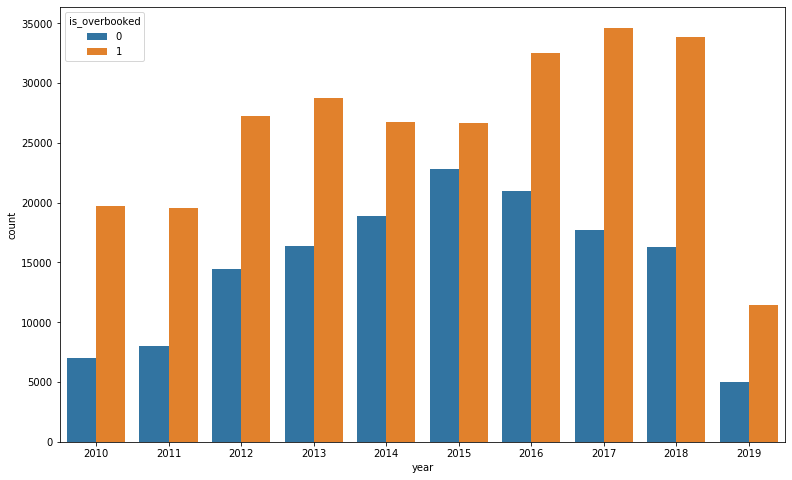

In [39]:
plt.figure(figsize=(13,8))
sns.countplot(data=df_1[['year','is_overbooked']],x='year',hue='is_overbooked')

In [40]:
# 2019un outlier değer olduğunu tespit ettik
flt_1=df_1['year']==2019
df_1[flt_1].groupby(['month']).count()['is_overbooked'].sort_values(ascending=False)

month
1    4449
3    4389
4    4104
2    3456
Name: is_overbooked, dtype: int64

In [41]:
flt_2=df_1['year']!=2019
df_2=df_1[flt_2].copy()
df_2.tail(3)

,departures_scheduled,departures_performed,seats,passengers,distance,air_time,unique_carrier,origin_airport_id,dest_airport_id,aircraft_type,year,month,seats_v1,passengers_v1,null_seats,null_seats_prop,day_per_departures_perf,distance_grouped,is_overbooked
392422,440.0,432.0,85946,72774,404.0,26233.0,1,10397,13204,622,2018,9,199,168,31,0.16,14.4,0,0
392423,444.0,441.0,87754,77724,404.0,26656.0,1,10397,13204,622,2018,10,199,176,23,0.12,14.7,0,1
392424,444.0,441.0,87756,78080,404.0,27521.0,1,13204,10397,622,2018,10,199,177,22,0.11,14.7,0,1


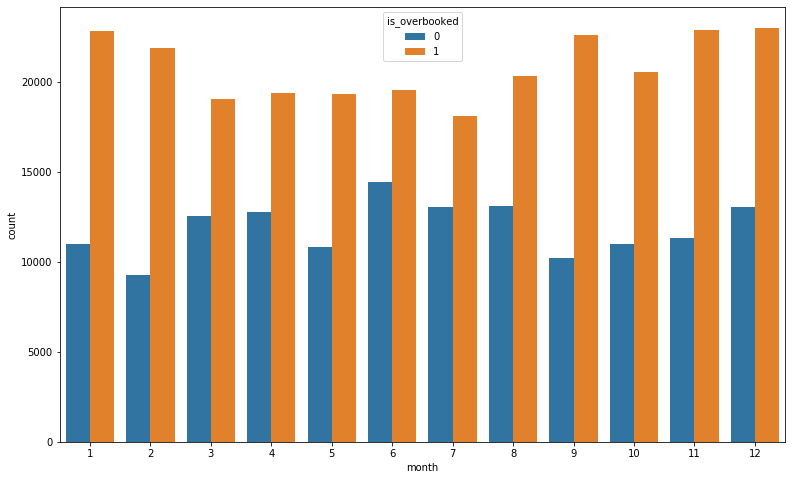

In [42]:
plt.figure(figsize=(13,8))
sns.countplot(data=df_2[['month','is_overbooked']],x='month',hue='is_overbooked')

In [43]:
df_2['unique_carrier'].value_counts()

1    178960
2    173797
0     39584
Name: unique_carrier, dtype: int64

In [44]:
'''
modellerimizi etkilemeyecek olan alanları belirleyerek verisetimizden çıkardık:
''' 
df_2.drop(['year','unique_carrier','air_time'],axis=1,inplace=True)
df_2.head(3)

,departures_scheduled,departures_performed,seats,passengers,distance,origin_airport_id,dest_airport_id,aircraft_type,month,seats_v1,passengers_v1,null_seats,null_seats_prop,day_per_departures_perf,distance_grouped,is_overbooked
0,1.0,1.0,120,120,2065.0,12889,12264,698,1,120,120,0,0.0,0.03,4,0
1,1.0,1.0,118,118,2065.0,12889,12264,612,2,118,118,0,0.0,0.03,4,0
2,1.0,0.0,0,0,1546.0,13204,11292,698,3,0,0,0,0.0,0.00,3,0


In [45]:
mapping={'seats_v1':'seats_per_departure',
        'passengers_v1':'passengers_per_departure',
        'null_seats':'empty_seats_per_departure',
        'null_seats_prop':'empty_seats_proportion',
        'day_per_departures_perf':'departures_per_day'}
df_2.rename(columns=mapping,inplace=True)
df_2.head(3)

,departures_scheduled,departures_performed,seats,passengers,distance,origin_airport_id,dest_airport_id,aircraft_type,month,seats_per_departure,passengers_per_departure,empty_seats_per_departure,empty_seats_proportion,departures_per_day,distance_grouped,is_overbooked
0,1.0,1.0,120,120,2065.0,12889,12264,698,1,120,120,0,0.0,0.03,4,0
1,1.0,1.0,118,118,2065.0,12889,12264,612,2,118,118,0,0.0,0.03,4,0
2,1.0,0.0,0,0,1546.0,13204,11292,698,3,0,0,0,0.0,0.00,3,0


In [46]:
def calc_per(a,b):
    try:
        result=round(a/b,2)
    except ZeroDivisionError:
        result=0
    return(result)

In [47]:
df_2['distance_per_departure']=calc_per(df_2.distance,df_2.departures_performed)
df_2.distance_per_departure.replace([np.inf,-np.inf],np.nan,inplace=True)
df_2[['distance','departures_performed','distance_per_departure']].head()

,distance,departures_performed,distance_per_departure
0,2065.0,1.0,2065.0
1,2065.0,1.0,2065.0
2,1546.0,0.0,NaN
3,1571.0,0.0,NaN
4,854.0,1.0,854.0


In [48]:
df_2.dropna(axis=0,inplace=True)
df_2.drop(['departures_scheduled','departures_performed','seats','passengers','distance','distance_grouped'],axis=1,inplace=True)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377360 entries, 0 to 392424
Data columns (total 11 columns):
origin_airport_id            377360 non-null int64
dest_airport_id              377360 non-null int64
aircraft_type                377360 non-null int64
month                        377360 non-null int64
seats_per_departure          377360 non-null int64
passengers_per_departure     377360 non-null int64
empty_seats_per_departure    377360 non-null int64
empty_seats_proportion       377360 non-null float64
departures_per_day           377360 non-null float64
is_overbooked                377360 non-null int64
distance_per_departure       377360 non-null float64
dtypes: float64(3), int64(8)
memory usage: 34.5 MB


In [49]:
df_2.head(5)

,origin_airport_id,dest_airport_id,aircraft_type,month,seats_per_departure,passengers_per_departure,empty_seats_per_departure,empty_seats_proportion,departures_per_day,is_overbooked,distance_per_departure
0,12889,12264,698,1,120,120,0,0.0,0.03,0,2065.0
1,12889,12264,612,2,118,118,0,0.0,0.03,0,2065.0
4,12266,13204,625,5,174,174,0,0.0,0.03,0,854.0
6,13230,13930,612,8,118,118,0,0.0,0.03,0,594.0
8,11292,13204,698,3,120,120,0,0.0,0.07,0,773.0


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 <a list of 11 Text yticklabel objects>)

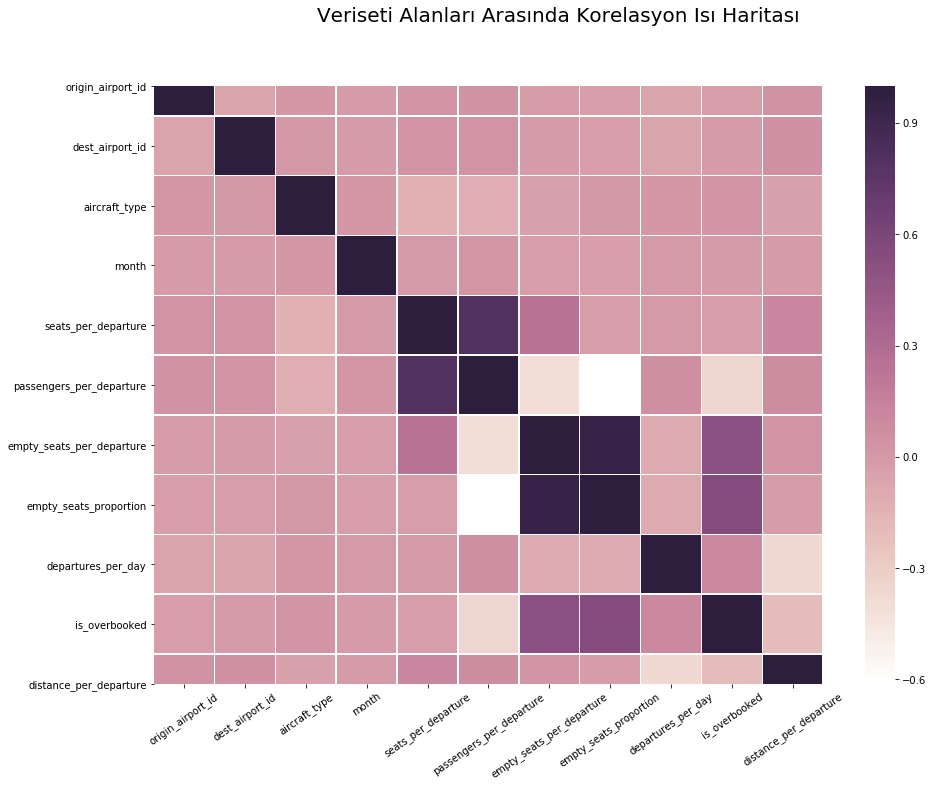

In [50]:
plt.figure(figsize=(15,11))
plt.suptitle('Veriseti Alanları Arasında Korelasyon Isı Haritası',fontsize=(20))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.heatmap(df_2.corr(),linewidths=.5,cmap=cmap,fmt="d")
plt.xticks(rotation=35)
plt.yticks(rotation=0)

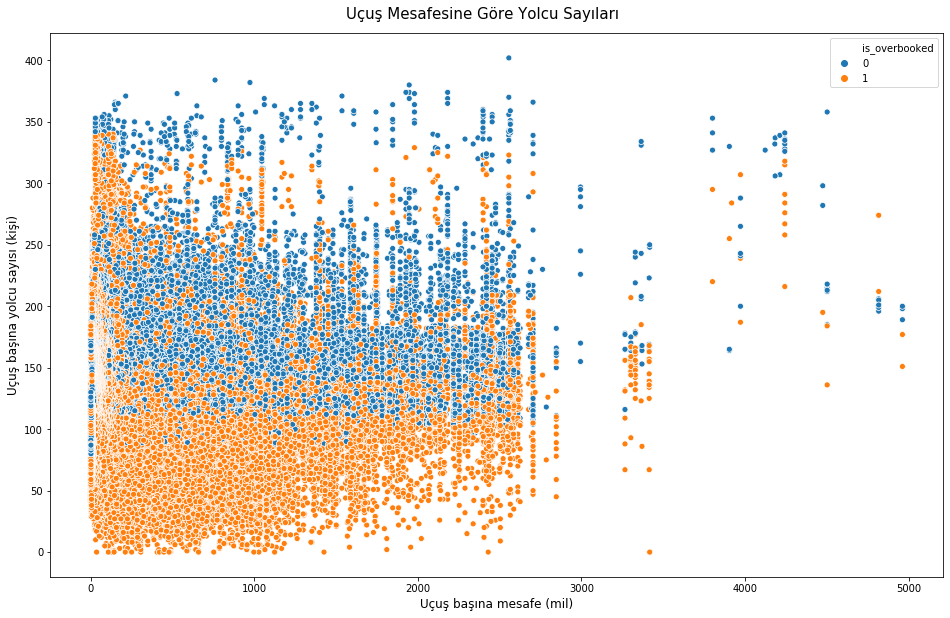

In [51]:
plt.figure(figsize=(16,10))
sns.scatterplot(x='distance_per_departure', y='passengers_per_departure', data=df_2,hue='is_overbooked')
plt.figtext(.5,.9,'Uçuş Mesafesine Göre Yolcu Sayıları', fontsize=15, ha='center')
plt.xlabel('Uçuş başına mesafe (mil)',fontsize=12)
plt.ylabel('Uçuş başına yolcu sayısı (kişi)',fontsize=12)
plt.show()

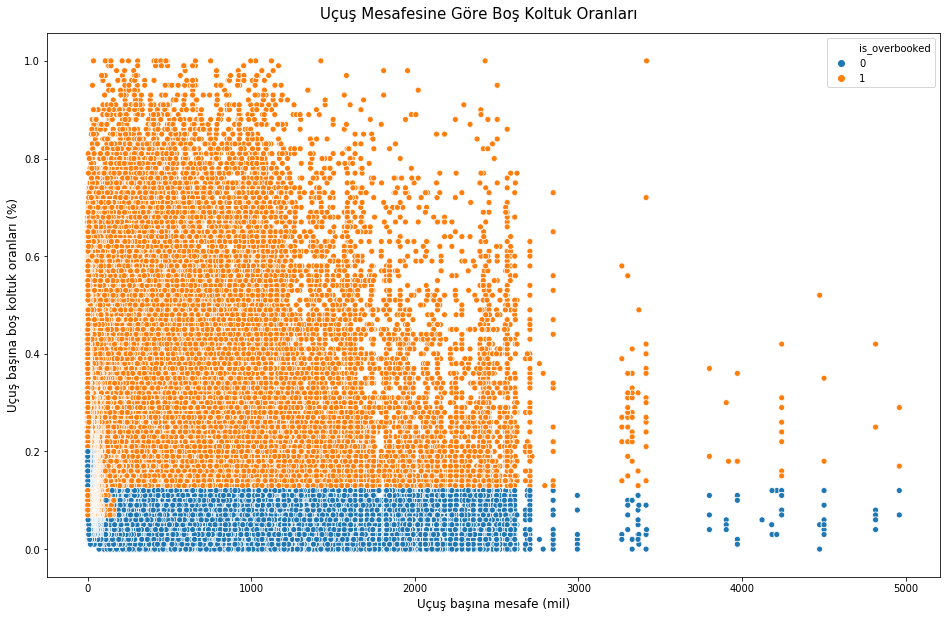

In [54]:
plt.figure(figsize=(16,10))
sns.scatterplot(x='distance_per_departure', y='empty_seats_proportion', data=df_2,hue='is_overbooked')
plt.figtext(.5,.9,'Uçuş Mesafesine Göre Boş Koltuk Oranları', fontsize=15, ha='center')
plt.xlabel('Uçuş başına mesafe (mil)',fontsize=12)
plt.ylabel('Uçuş başına boş koltuk oranları (%)',fontsize=12)
plt.show()

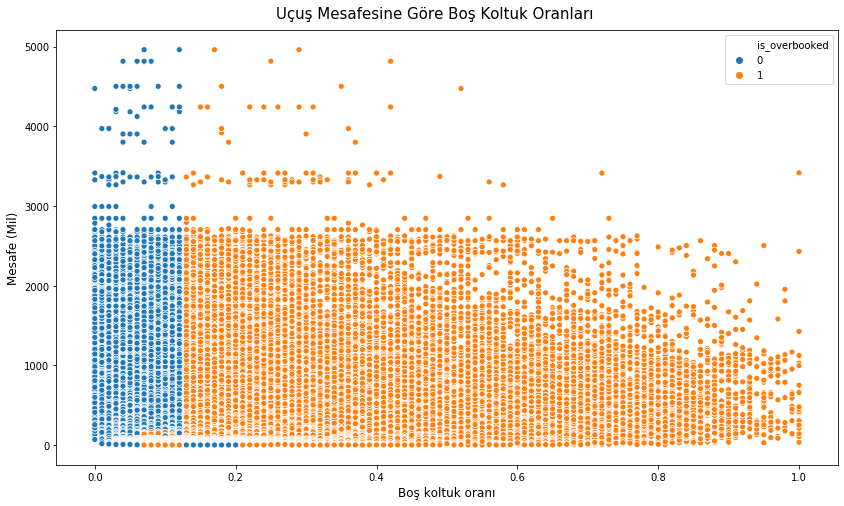

In [55]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='empty_seats_proportion', y='distance_per_departure', data=df_2,hue='is_overbooked')
plt.figtext(.5,.9,'Uçuş Mesafesine Göre Boş Koltuk Oranları', fontsize=15, ha='center')
plt.xlabel('Boş koltuk oranı',fontsize=12)
plt.ylabel('Mesafe (Mil)',fontsize=12)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BCCF635988>,
      dtype=object)

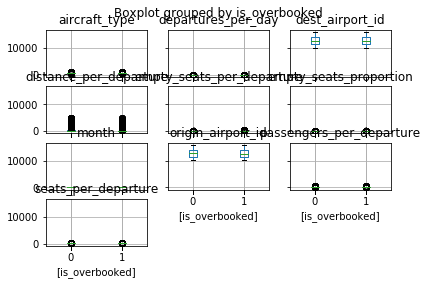

In [56]:
df_2.boxplot(by = 'is_overbooked')

In [57]:
df_3=df_2[[ "is_overbooked" , "origin_airport_id", "dest_airport_id" , "aircraft_type", "month" , "seats_per_departure" , "passengers_per_departure" , "empty_seats_per_departure" , "empty_seats_proportion" , "departures_per_day"  , "distance_per_departure"]]

In [58]:
df_3.head(5)

,is_overbooked,origin_airport_id,dest_airport_id,aircraft_type,month,seats_per_departure,passengers_per_departure,empty_seats_per_departure,empty_seats_proportion,departures_per_day,distance_per_departure
0,0,12889,12264,698,1,120,120,0,0.0,0.03,2065.0
1,0,12889,12264,612,2,118,118,0,0.0,0.03,2065.0
4,0,12266,13204,625,5,174,174,0,0.0,0.03,854.0
6,0,13230,13930,612,8,118,118,0,0.0,0.03,594.0
8,0,11292,13204,698,3,120,120,0,0.0,0.07,773.0


In [59]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377360 entries, 0 to 392424
Data columns (total 11 columns):
is_overbooked                377360 non-null int64
origin_airport_id            377360 non-null int64
dest_airport_id              377360 non-null int64
aircraft_type                377360 non-null int64
month                        377360 non-null int64
seats_per_departure          377360 non-null int64
passengers_per_departure     377360 non-null int64
empty_seats_per_departure    377360 non-null int64
empty_seats_proportion       377360 non-null float64
departures_per_day           377360 non-null float64
distance_per_departure       377360 non-null float64
dtypes: float64(3), int64(8)
memory usage: 34.5 MB


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(df_3.iloc[:, 1:], df_3.iloc[:, 0], 
                                                    test_size = 0.2, random_state=42)

In [61]:
y_train.head(5)

280271    1
34692     1
124405    0
39828     1
149021    0
Name: is_overbooked, dtype: int64

C:\Users\OZAN\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\OZAN\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


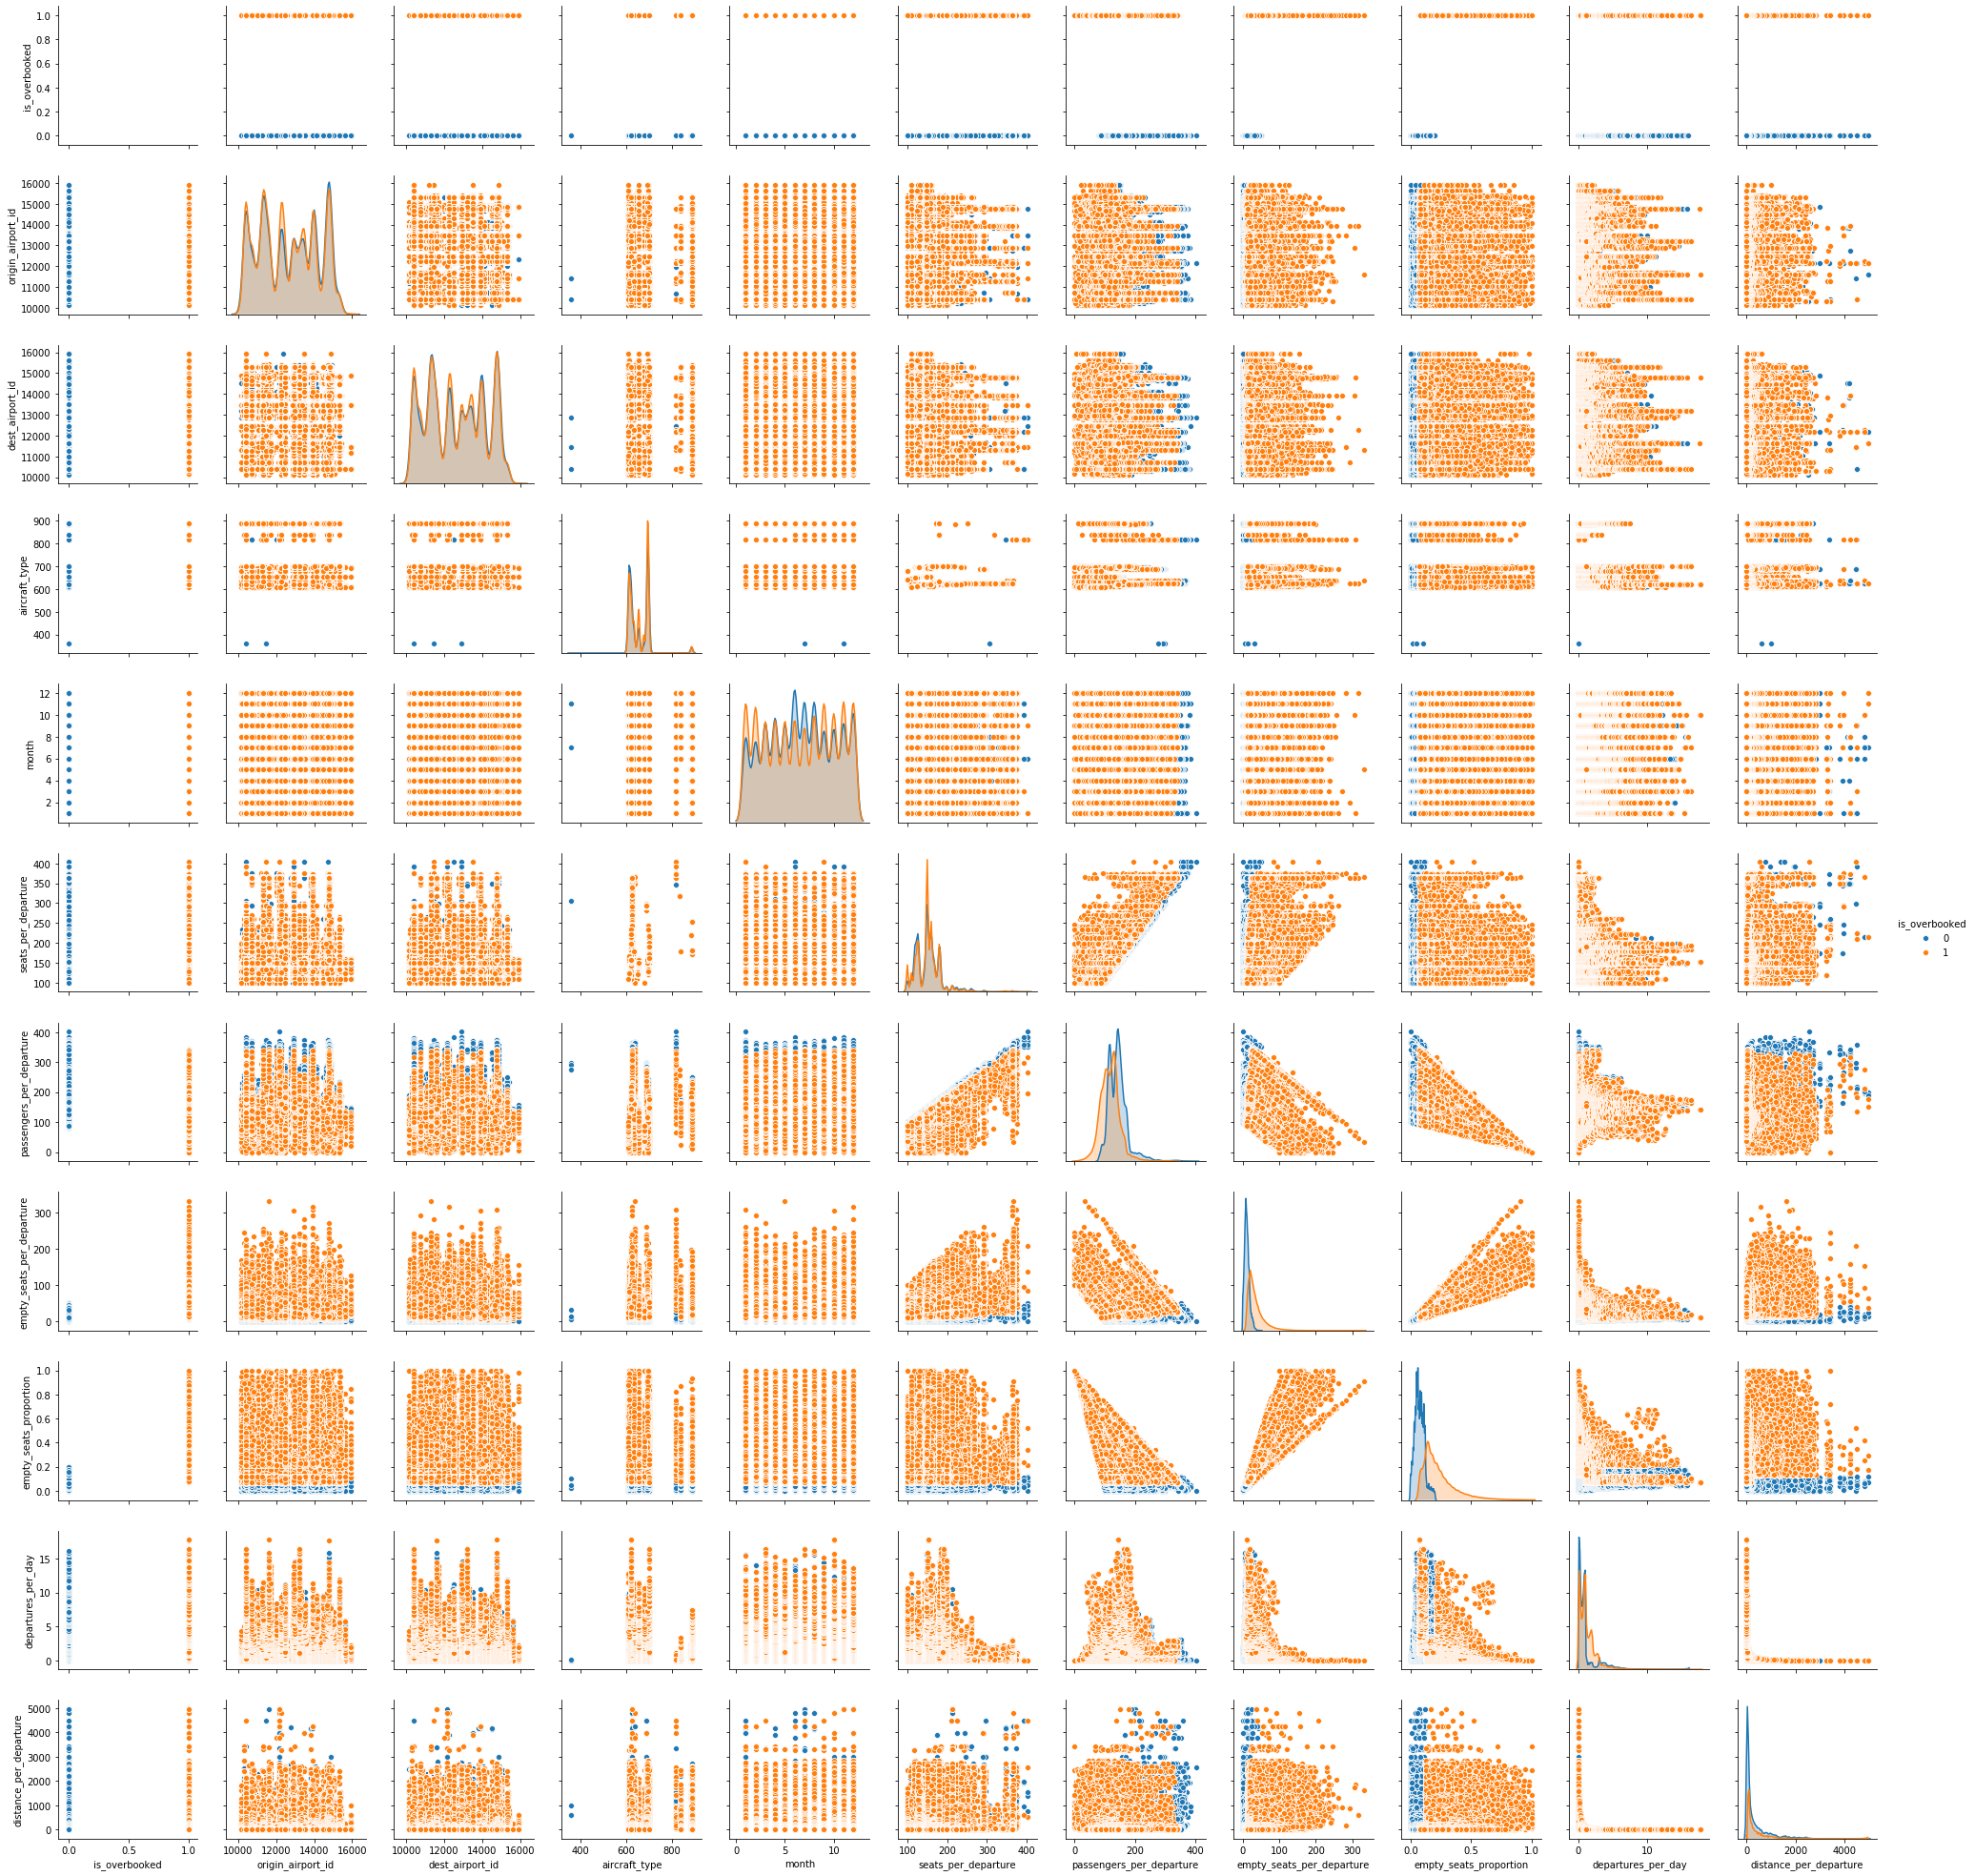

In [62]:
sns.pairplot(df_3, hue='is_overbooked');

In [63]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.dummy import DummyClassifier

import matplotlib.pyplot as plt
%matplotlib inline

nb = GaussianNB()
nb.fit(X_train, y_train)
nb.score(X_test, y_test)

0.8264256942972228

In [64]:
nb = BernoulliNB()
nb.fit(X_train,y_train)
nb.score(X_test,y_test)

0.6696788212847149

In [65]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
nb.score(X_test, y_test)

0.6853402586389654

In [ ]:
print(rand.best_params_)

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [69]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [70]:
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8532700869196523


In [71]:
from sklearn.svm import SVC, LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)


C:\Users\OZAN\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [72]:
Y_pred = linear_svc.predict(X_test)
linear_svc.score(X_test, y_test)


0.8574438202247191

In [73]:

from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=5 , max_depth=1)
decision_tree.fit(X_train, y_train) 



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=5, splitter='best')

In [74]:
Y_pred = decision_tree.predict(X_test)
decision_tree.score(X_test, y_test)

0.8604913080347678

In [75]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=2, oob_score = False)
random_forest.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
Y_prediction = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

0.9996091265634938

In [77]:
#boosting
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
seed = 7
num_trees = 2
kfold = model_selection.KFold(n_splits=220, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.6613481571344214


In [78]:
from sklearn.ensemble import AdaBoostClassifier

seed = 7
num_trees = 8
kfold = model_selection.KFold(n_splits=10, random_state=seed)

model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.947066454373093


In [84]:
# for voting=hard (mean)
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

voting_classifer = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard', n_jobs=-1)
voting_classifer.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=1, solver='warn',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                              

In [85]:
y_pred = voting_classifer.predict(X_test)
accuracy_score(y_test, y_pred)

0.9092113631545474

In [86]:
# for voting=soft (max)
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

voting_classifer = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft', n_jobs=-1)
voting_classifer.fit(X_train, y_train)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=1, solver='warn',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                              

In [87]:
y_pred = voting_classifer.predict(X_test)
accuracy_score(y_test, y_pred)

0.9418327326690693

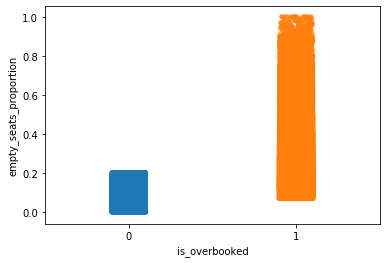

In [88]:


sns.stripplot(x='is_overbooked',y='empty_seats_proportion', jitter=True,data=df_3,alpha=0.6);




In [89]:
from sklearn.metrics import precision_score, recall_score

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(voting_classifer, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[ 96580,   5655],
       [ 11653, 188000]], dtype=int64)

In [90]:
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

0.9559937758703103

In [91]:
from sklearn.metrics import roc_auc_score

y_scores = voting_classifer.predict_proba(X_train)
y_scores = y_scores[:,1]
r_a_score = roc_auc_score(y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9924420277211479


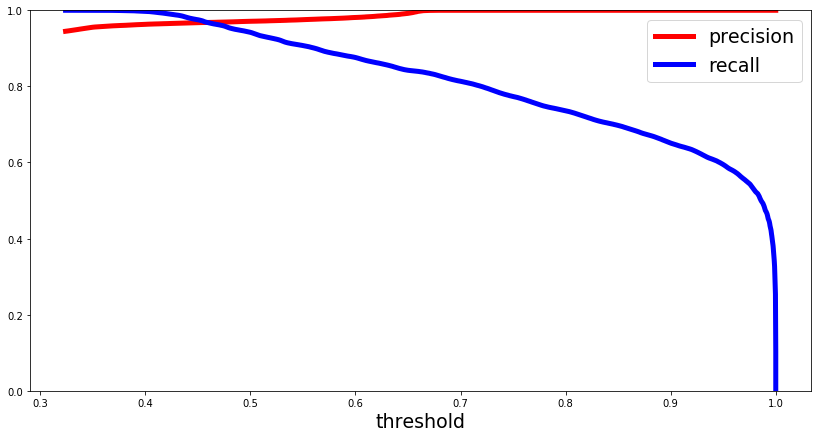

In [92]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = voting_classifer.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
knn_confusion = confusion_matrix(y_test, knn.predict(X_test))
plt.figure(dpi=150)

sns.heatmap(knn_confusion, cmap=plt.cm.Blues, annot=True, square=True,
           xticklabels=df_3['is_overbooked'],
           yticklabels=df_3['is_overbooked'])